## Oil Presence for a Single Spill

Second figure request for Stephanie

In [53]:
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as mcm
import numpy as np
import xarray as xr

%matplotlib inline

In [60]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15
viridis = mcm.get_cmap('viridis', 256)
viridis.set_bad(viridis(0))
print(viridis(0.1))

(0.282623, 0.140926, 0.457517, 1.0)


In [3]:
mesh = xr.open_dataset('/home/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [4]:
data = xr.open_dataset('/home/sallen/Documents/MIDOSS/Visualization/Lagrangian_diesel-4_northern_strait_first30-4.nc')

In [10]:
imin, imax = 1, -1
jmin, jmax = 1, -1

In [6]:
raw = data.OilWaterColumnOilVol_3D[:, 39].values.sum(axis=0)

In [70]:
oil_array = (raw > 0.001).astype(int)
print (oil_array.max())
#oil = np.ma.masked_array(oil_array, oil_array < 0.01)  #mask anything less than 1%
oil = oil_array
print (oil)

1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


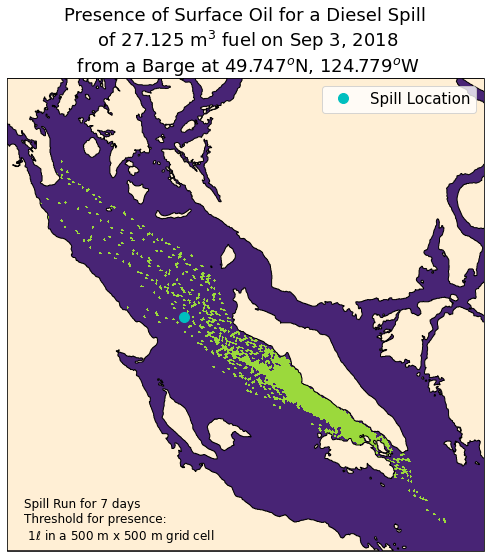

In [75]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour), zorder=2)

C = ax.pcolormesh(
    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], 10+oil*75,  vmax=100, vmin=0,
    transform=crs.PlateCarree(), zorder=1, cmap=viridis
)
ax.plot(-124.779, 49.747, 'co', zorder=3, markersize=10, transform=crs.PlateCarree(), label="Spill Location")
ax.legend(loc='upper right')
#b = fig.colorbar(C, ax=ax);
#cb.set_label('Presence (%)')
ax.set_title("Presence of Surface Oil for a Diesel Spill\n of 27.125 m$^3$ fuel on Sep 3, 2018\n from a Barge at 49.747$^o$N, 124.779$^o$W");
fig.tight_layout()
ax.text(-125.25, 49.32, 'Spill Run for 7 days\nThreshold for presence:\n 1$\ell$ in a 500 m x 500 m grid cell',
       transform=crs.PlateCarree(), fontsize=12)
fig.savefig('Single_1B_pcolormesh.png')